In [1]:
import sys
sys.path.insert(0, '../../src')
from utils import preprocession as prep
from utils.metrics import compute_metric, add_to_metrics, columns
from utils import visualization as vis

import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl


from openTSNE import TSNE
from scipy.spatial.distance import cdist

from tqdm.notebook import tqdm
tqdm.pandas()

In [2]:
folder_name = 'Smartvote'
data_name = 'Original'

train, test = prep.load_data(folder_name, data_name)
train_users, train_reactions = train
test_users, test_reactions = test

p = 0
K = train_reactions[p].shape[1]
K

75

In [12]:
train_data = prep.impute_dataframe(train_reactions[p])
test_data  = prep.impute_dataframe(test_reactions[p], mean=train_reactions[p].mean())

tsne = TSNE(
    perplexity=30,
    metric="euclidean",
    #n_jobs=8,
    random_state=42,
    #verbose=True,
)

train_embedding = tsne.fit(train_data.values)

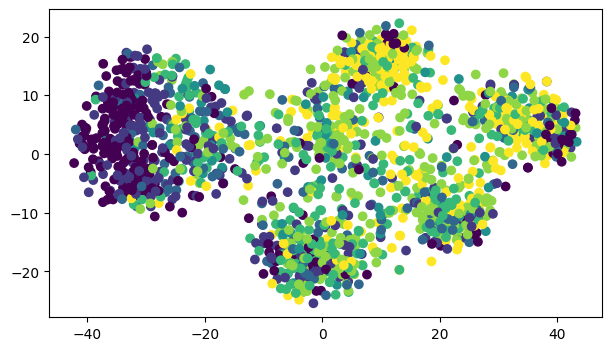

In [10]:
q =0 

fig, ax = plt.subplots(figsize=(8,4))
ax = vis.plotEmbedding(pd.DataFrame(train_embedding, index=train_data.index),  c=train_data.loc[:,str(q)], ax=ax)
plt.show()

In [17]:
test_embedding = train_embedding.transform(test_data.values)

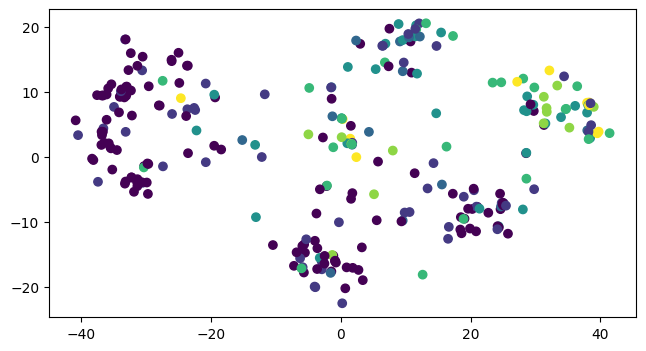

In [19]:
q =2

fig, ax = plt.subplots(figsize=(8,4))
ax = vis.plotEmbedding(pd.DataFrame(test_embedding, index=test_data.index),  c=test_data.loc[:,str(q)], ax=ax)
plt.show()